In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('zomato.csv') #dataset can be downloaded from Kaggle
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

#### Removing Unnnecessary Columns

In [4]:
df_raw=df.drop(['url','dish_liked','phone','menu_item'],axis=1)

In [5]:
df_raw.duplicated().sum()

50

In [6]:
df_raw.drop_duplicates(inplace=True)
df_raw.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [7]:
df_raw.shape

(51667, 13)

In [8]:
df_raw['approx_cost(for two people)'].value_counts()

300      7565
400      6554
500      4974
200      4853
600      3711
         ... 
3,700       1
160         1
5,000       1
469         1
560         1
Name: approx_cost(for two people), Length: 70, dtype: int64

In [9]:
df_raw=df_raw.rename(columns={'approx_cost(for two people)':'cost'})

df_raw['cost'] = df_raw['cost'].astype(str) 
df_raw['cost'] = df_raw['cost'].apply(lambda x: x.replace(',','')) 
df_raw['cost'] = df_raw['cost'].astype(float) 

In [10]:
df_raw['cost'].value_counts()

300.0     7565
400.0     6554
500.0     4974
200.0     4853
600.0     3711
          ... 
560.0        1
60.0         1
160.0        1
469.0        1
3700.0       1
Name: cost, Length: 70, dtype: int64

In [11]:
df_raw.isnull().sum()

address               0
name                  0
online_order          0
book_table            0
rate               7765
votes                 0
location             21
rest_type           227
cuisines             45
cost                345
reviews_list          0
listed_in(type)       0
listed_in(city)       0
dtype: int64

In [12]:
df_raw = df_raw.dropna(axis=0, subset=['cost'])

g = df_raw.dropna(subset=['rest_type']).drop_duplicates('name').set_index('name')['rest_type']
df_raw['rest_type'] = df_raw['rest_type'].fillna(df_raw['name'].map(g))

h = df_raw.dropna(subset=['rate']).drop_duplicates('name').set_index('name')['rate']
df_raw['rate'] = df_raw['rate'].fillna(df_raw['name'].map(h))

i = df_raw.dropna(subset=['cuisines']).drop_duplicates('name').set_index('name')['cuisines']
df_raw['cuisines'] = df_raw['cuisines'].fillna(df_raw['name'].map(i))

In [13]:
df_raw.isnull().sum()

address               0
name                  0
online_order          0
book_table            0
rate               5310
votes                 0
location              0
rest_type           110
cuisines              6
cost                  0
reviews_list          0
listed_in(type)       0
listed_in(city)       0
dtype: int64

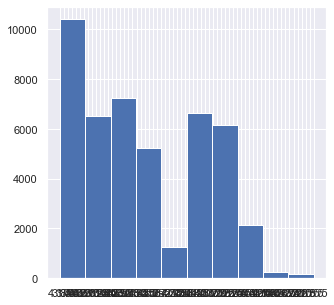

In [14]:
df_raw['rate'].hist(figsize=(5,5))

In [15]:
df_raw['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '3.4 /5', nan, '2.6/5', '3.8 /5',
       '3.4/5', '4.5/5', '2.5/5', '3.3 /5', '-', '2.7/5', '3.2 /5',
       '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.0 /5', '3.6 /5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '3.7 /5', '3.1 /5',
       '2.9 /5', '2.8 /5', '3.5 /5', '2.7 /5', '2.5 /5', '2.6 /5',
       '4.5 /5', '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5',
       '4.6 /5', '4.9 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
df_raw['rate']=df_raw['rate'].replace("-",np.NaN)

df_raw=df_raw[df_raw['rate'] != 'NEW' ]

df_raw['rate'] = df_raw['rate'].astype(str) 
df_raw['rate'] = df_raw['rate'].apply(lambda x: x.replace('/5','')) 
df_raw['rate'] = df_raw['rate'].astype(float) 

In [17]:
df_raw['rate']=df_raw['rate'].fillna(df_raw['rate'].median())

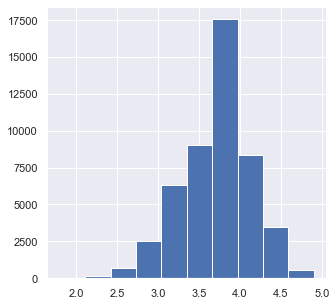

In [18]:
df_raw['rate'].hist(figsize=(5,5))

In [19]:
df_raw.dropna(how='any',inplace=True)

In [20]:
df_raw.isnull().sum()

address            0
name               0
online_order       0
book_table         0
rate               0
votes              0
location           0
rest_type          0
cuisines           0
cost               0
reviews_list       0
listed_in(type)    0
listed_in(city)    0
dtype: int64

In [21]:
df_raw.shape

(48553, 13)

In [22]:
df_raw['votes']=df_raw['votes'].astype(int)

In [23]:
df_raw['online_order'].replace(('Yes','No'),(True, False),inplace=True)

df_raw['book_table'].replace(('Yes','No'),(True, False),inplace=True)

In [24]:
df_raw.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [25]:
#Encode the input Variables
def Encode(df_raw):
    for column in df_raw.columns[~df_raw.columns.isin(['rate', 'cost', 'votes'])]:
        df_raw[column] = df_raw[column].factorize()[0]
    return df_raw

zomato = Encode(df_raw.copy())
zomato.head() # looking at the dataset after transformation

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,listed_in(type),listed_in(city)
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

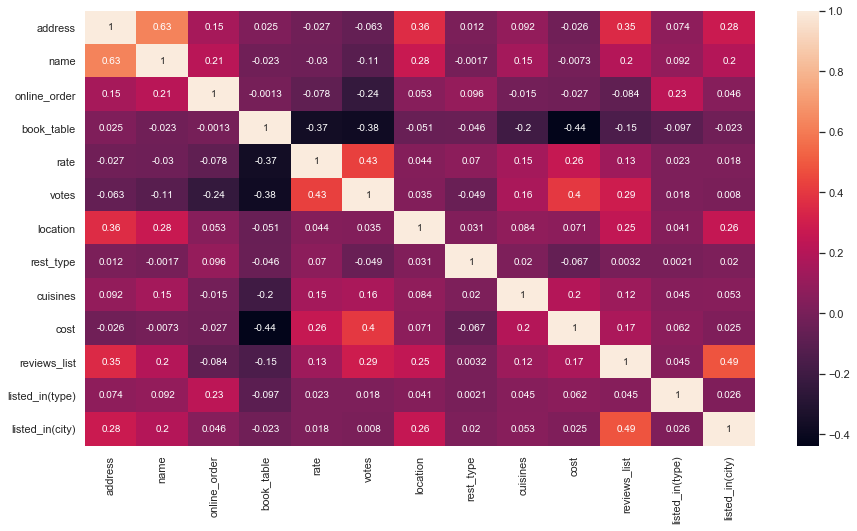

In [26]:
corr = zomato.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
zomato.columns

In [27]:
corr["cost"].sort_values(ascending=False)

cost               1.000000
votes              0.399682
rate               0.263114
cuisines           0.201275
reviews_list       0.172454
location           0.070761
listed_in(type)    0.062179
listed_in(city)    0.025449
name              -0.007347
address           -0.025683
online_order      -0.026937
rest_type         -0.066595
book_table        -0.437674
Name: cost, dtype: float64

In [28]:
X=zomato.drop(['cost'],axis=1)
y=zomato['cost']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.1,random_state=353)

X_train.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,reviews_list,listed_in(type),listed_in(city)
40885,9511,7397,1,1,3.7,0,18,2,5,17613,2,22
26771,4646,3903,0,1,4.3,338,22,0,1473,12198,2,16
5414,2855,2497,0,1,3.5,75,37,2,1032,3155,2,4
19044,6966,5654,0,1,3.2,574,52,0,1944,8866,4,11
10377,5317,4472,1,1,3.7,0,15,12,54,89,3,6


Text(0.5, 1.0, 'Restaurants delivering online or Not')

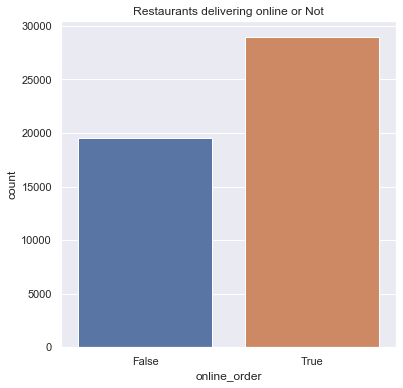

In [33]:
sns.countplot(df_raw['online_order'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Restaurants delivering online or Not')

Text(0.5, 1.0, 'Restaurants allowing table booking or not')

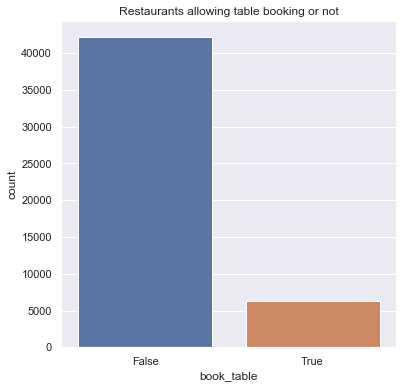

In [31]:
sns.countplot(df_raw['book_table'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('Restaurants allowing table booking or not')

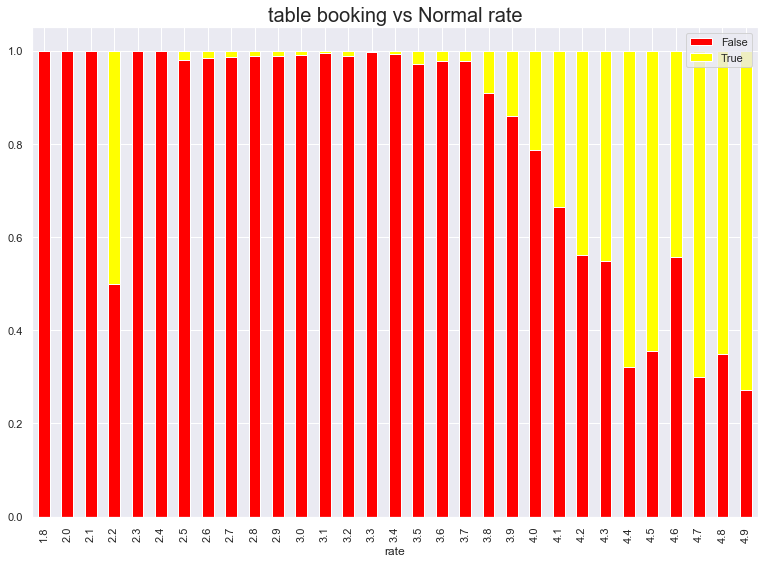

In [37]:
plt.rcParams['figure.figsize'] = (13, 9)
pd.crosstab(df_raw['rate'], df_raw['book_table']).div(pd.crosstab(df_raw['rate'], df_raw['book_table']).sum(1).astype(float),
                                                      axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('table booking vs Normal rate', fontweight = 30, fontsize = 20)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Location wise count for restaurants')

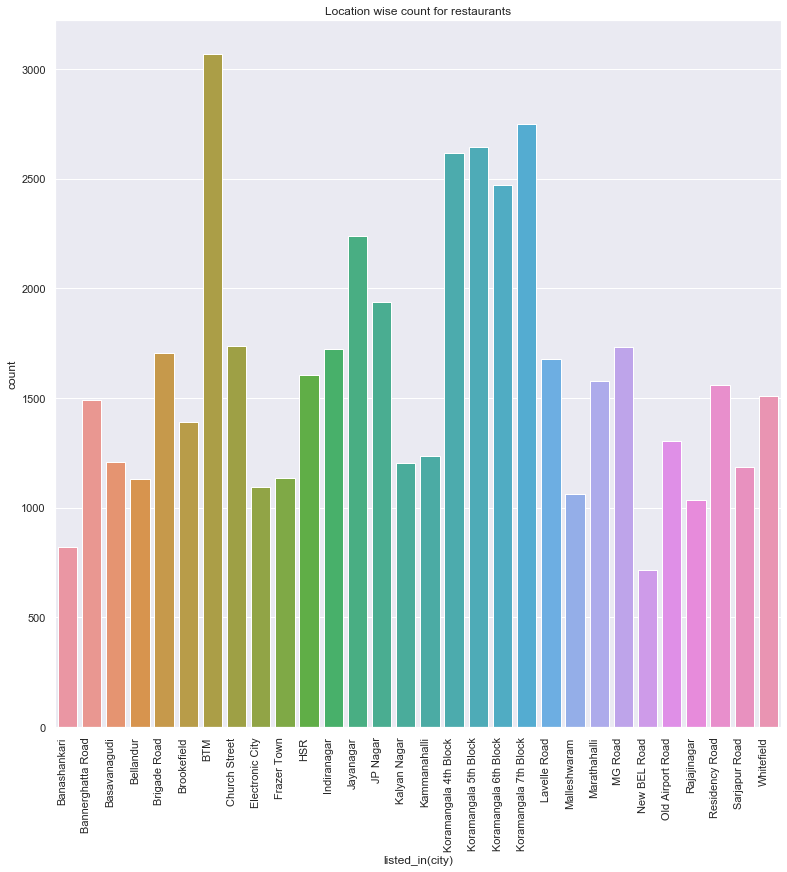

In [42]:
sns.countplot(df_raw['listed_in(city)'])
sns.countplot(df_raw['listed_in(city)']).set_xticklabels(sns.countplot(df_raw['listed_in(city)']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Location wise count for restaurants')

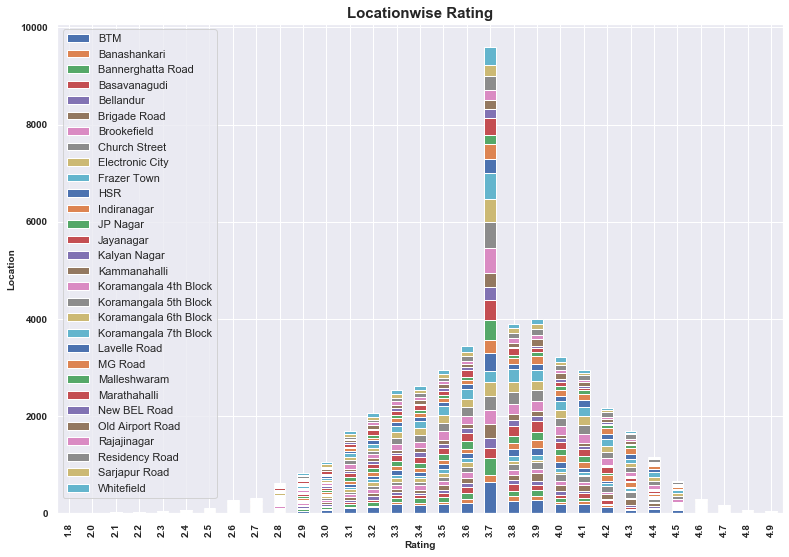

In [43]:
pd.crosstab(df_raw['rate'],df_raw['listed_in(city)']).plot(kind='bar',stacked=True)
plt.title('Locationwise Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend();

Text(0.5, 1.0, 'Restuarant Type')

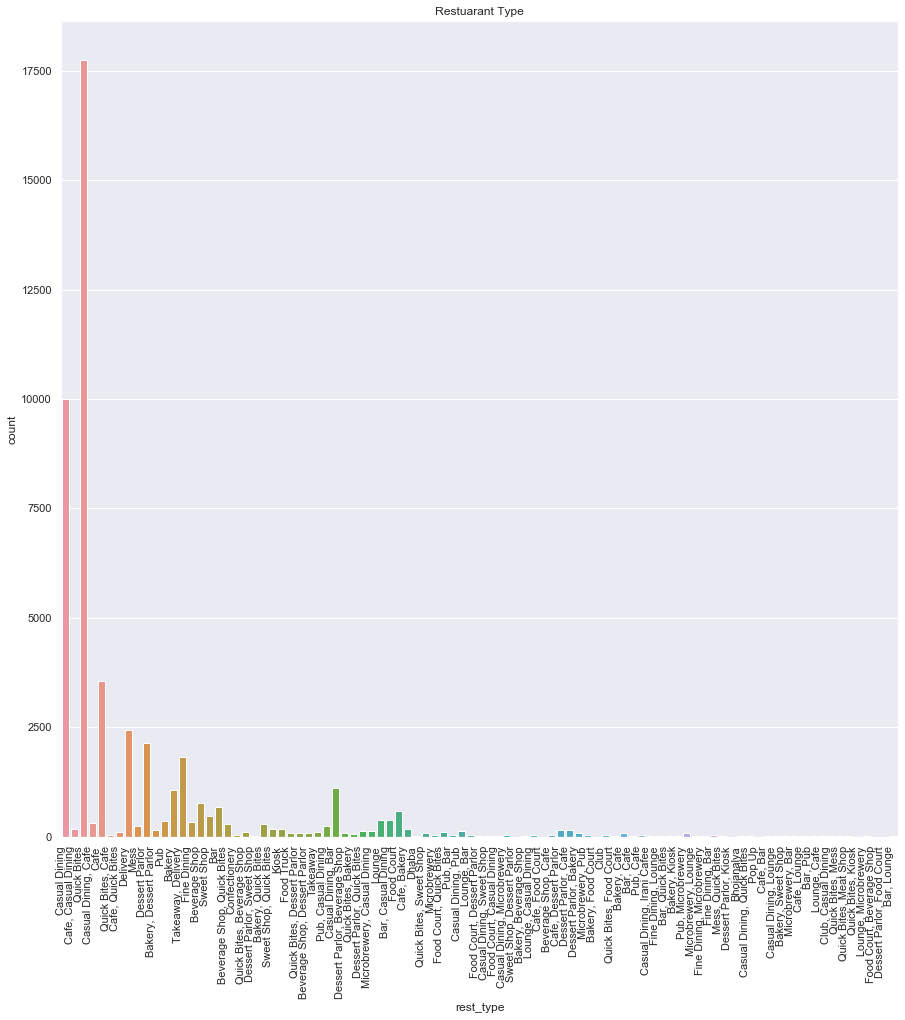

In [52]:
sns.countplot(df_raw['rest_type'])
sns.countplot(df_raw['rest_type']).set_xticklabels(sns.countplot(df_raw['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Restuarant Type')

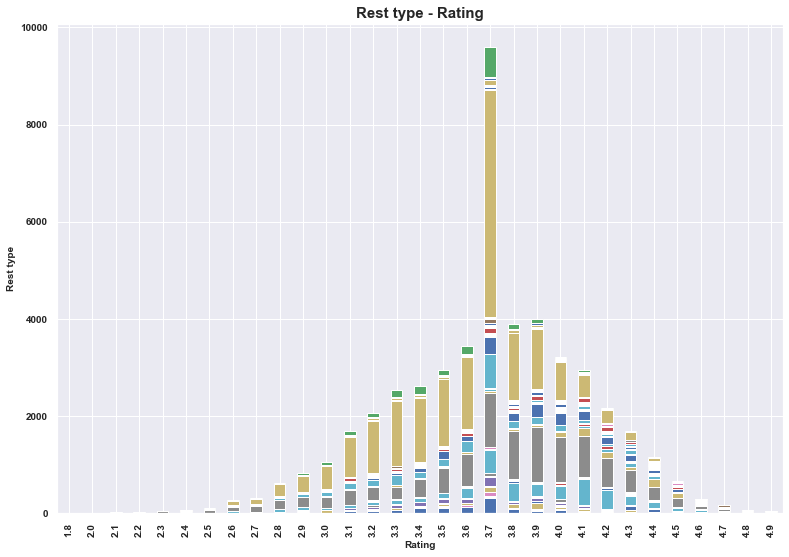

In [46]:
pd.crosstab(df_raw['rate'],df_raw['rest_type']).plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

Text(0.5, 1.0, 'Type of Service')

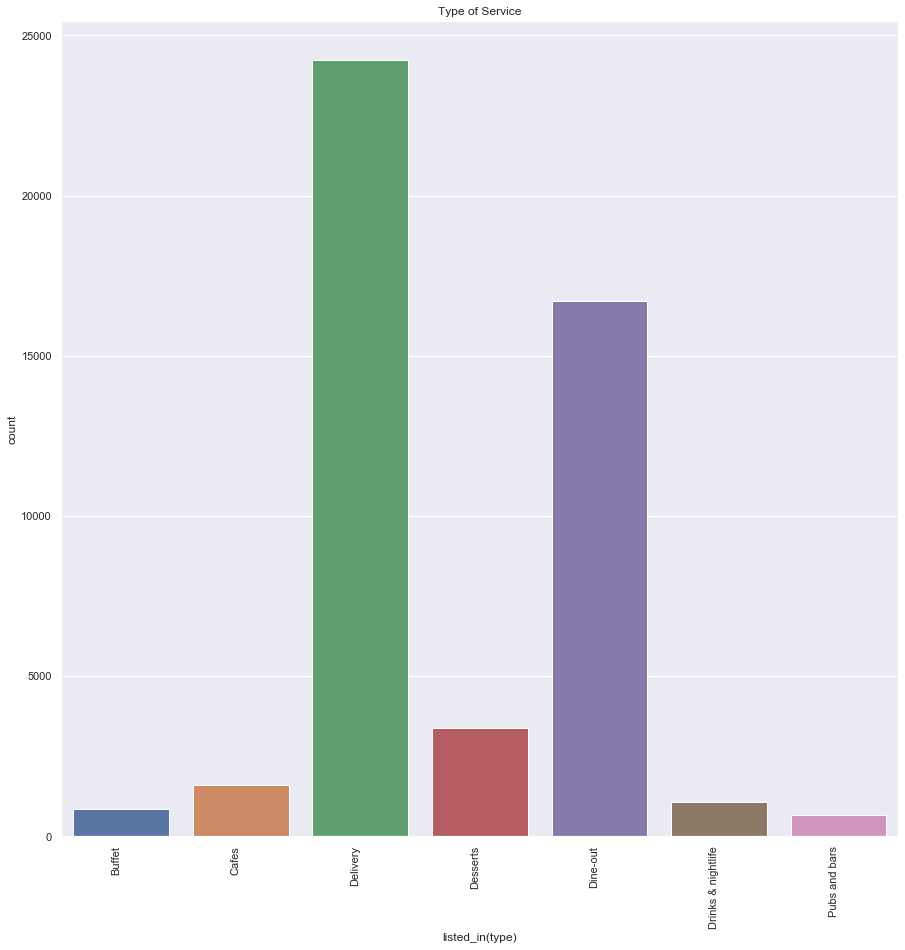

In [50]:
sns.countplot(df_raw['listed_in(type)'])
sns.countplot(df_raw['listed_in(type)']).set_xticklabels(sns.countplot(df_raw['listed_in(type)']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Type of Service')

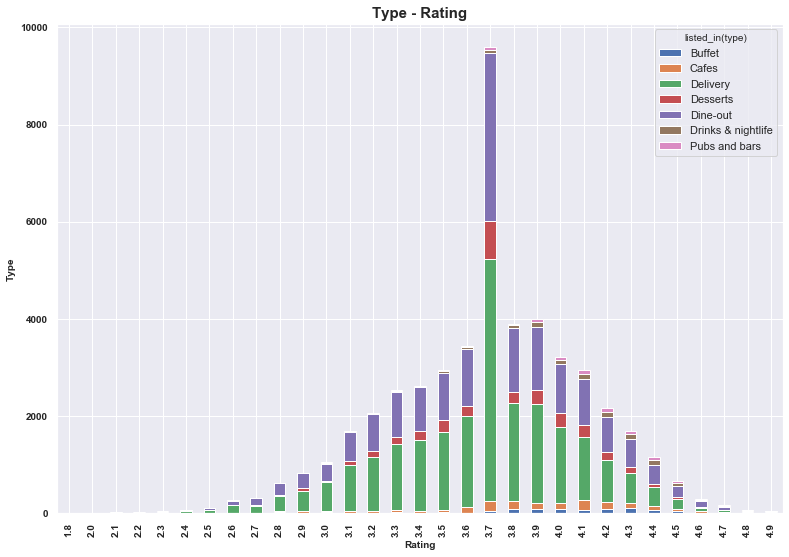

In [55]:
pd.crosstab(df_raw['rate'],df_raw['listed_in(type)']).plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

Text(0.5, 1.0, 'Cost of Restuarant')

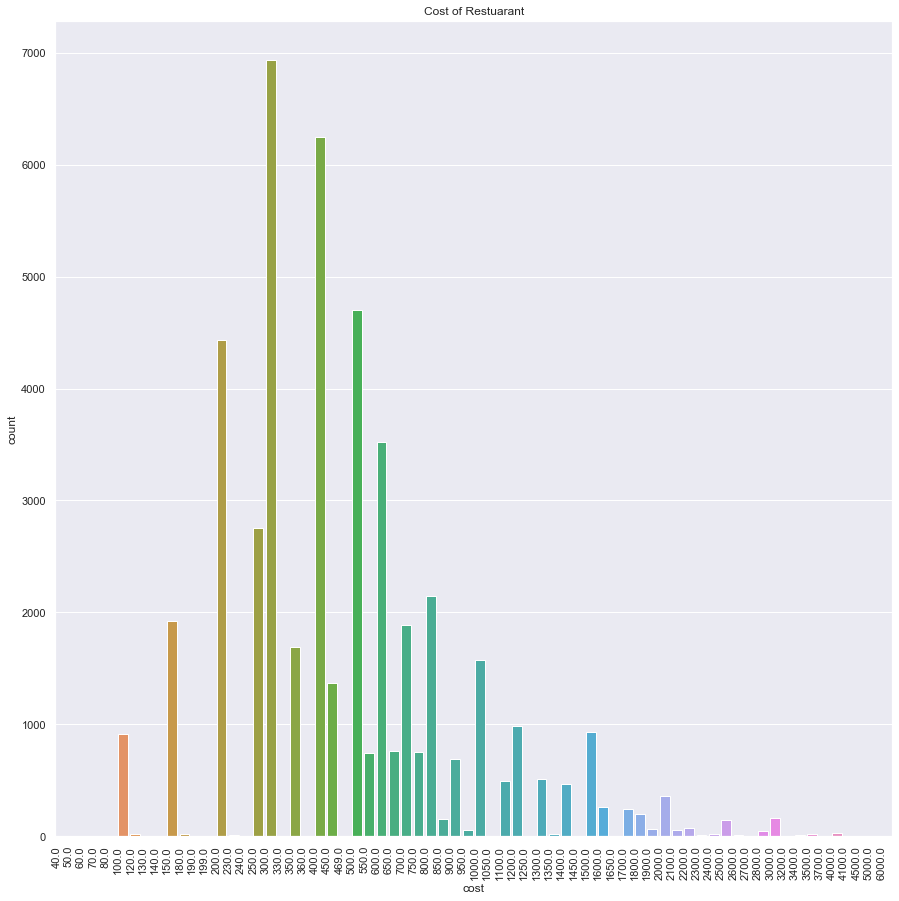

In [56]:
sns.countplot(df_raw['cost']).set_xticklabels(sns.countplot(df_raw['cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')

Text(0.5, 1.0, 'NO. of restaurants in a Location')

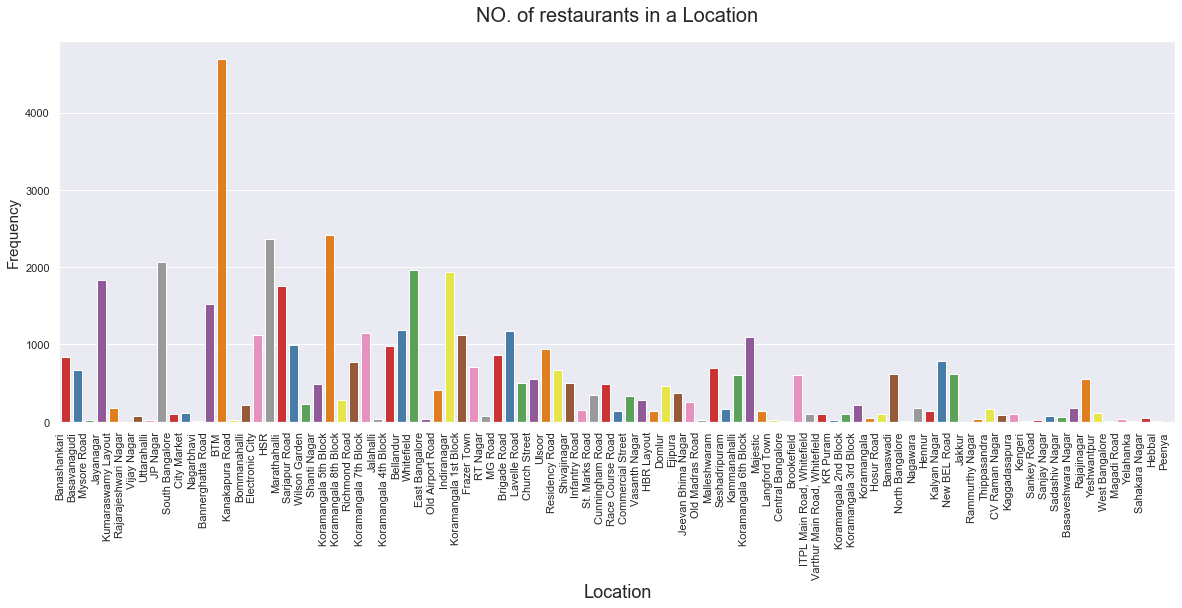

In [57]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=df_raw, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

Text(0.5, 0, 'Number of outlets')

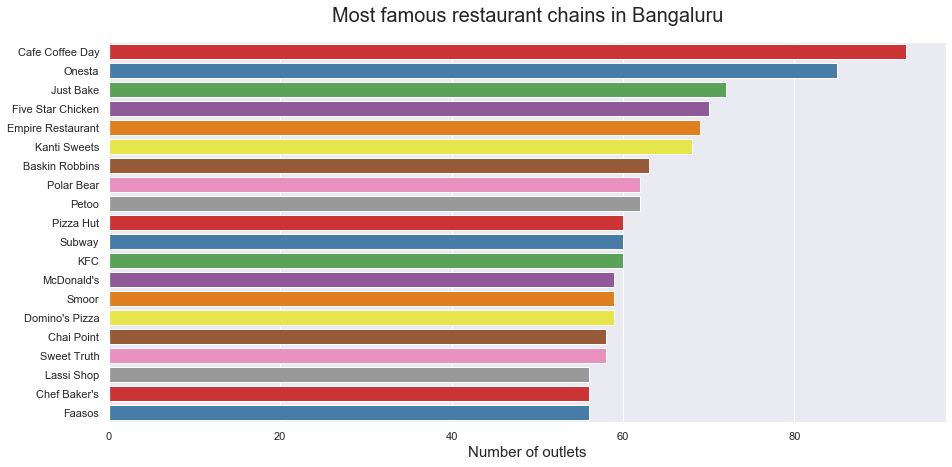

In [58]:
plt.figure(figsize=(15,7))
chains=df_raw['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

In [61]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5072671914025538

In [62]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,y_train)
y_predict=DTree.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9395728208051489

In [63]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(X_train,y_train)
y_predict=RForest.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9545050664812995

In [ ]:
import pickle
# Saving model to disk
pickle.dump(ETree, open('model.pkl','wb'))